In [1]:
import pandas as pd

data=pd.read_csv("MeMas_5min.csv",header=0,infer_datetime_format=True,parse_dates=['Data'],index_col=['Data'])
hourly_data=data.resample('H').sum()
hourly_data

,Ativa
Data,
2018-04-22 00:00:00,642.96
2018-04-22 01:00:00,643.68
2018-04-22 02:00:00,637.20
2018-04-22 03:00:00,632.88
2018-04-22 04:00:00,629.28
...,...
2020-02-15 19:00:00,727.92
2020-02-15 20:00:00,720.72
2020-02-15 21:00:00,710.64


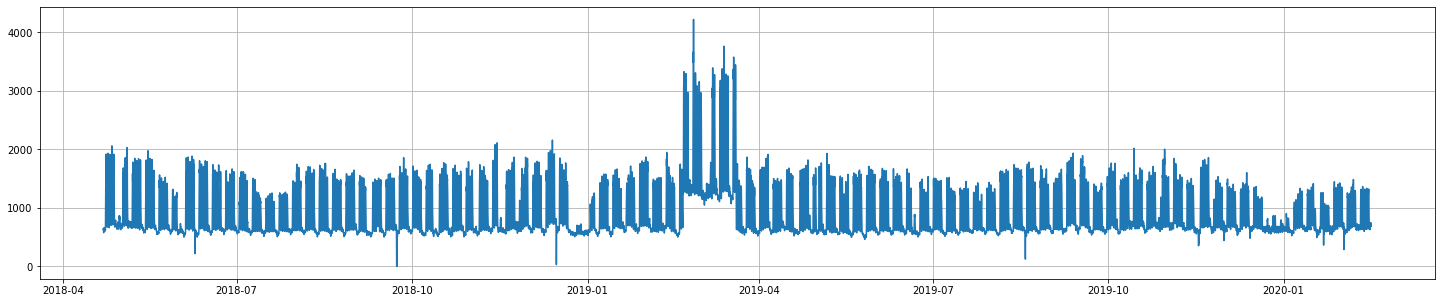

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,5))
plt.plot(hourly_data)
plt.grid()

In [15]:
dataset1 = hourly_data.truncate('2018-06-5','2018-12-20')
dataset1

,Ativa
Data,
2018-06-05 00:00:00,642.96
2018-06-05 01:00:00,640.08
2018-06-05 02:00:00,640.08
2018-06-05 03:00:00,640.80
2018-06-05 04:00:00,652.32
...,...
2018-12-19 20:00:00,802.80
2018-12-19 21:00:00,777.60
2018-12-19 22:00:00,753.12


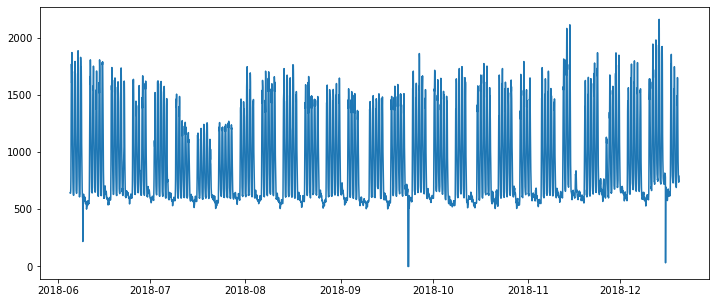

In [19]:
plt.figure(figsize=(12,5))
plt.plot(dataset1)

In [17]:
dataset2 = hourly_data.truncate('2019-04-01','2019-12-20')
dataset2

,Ativa
Data,
2019-04-01 00:00:00,566.64
2019-04-01 01:00:00,574.56
2019-04-01 02:00:00,578.16
2019-04-01 03:00:00,573.12
2019-04-01 04:00:00,562.32
...,...
2019-12-19 20:00:00,756.00
2019-12-19 21:00:00,726.48
2019-12-19 22:00:00,713.52


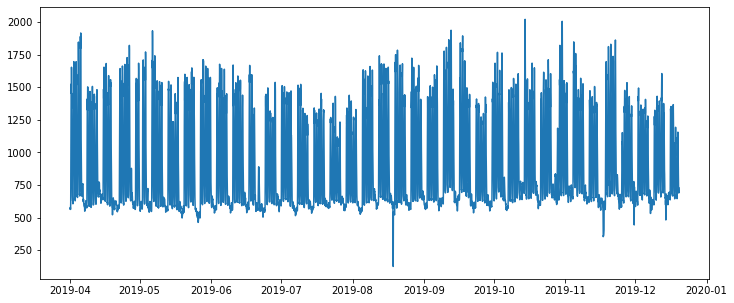

In [20]:
plt.figure(figsize=(12,5))
plt.plot(dataset2)

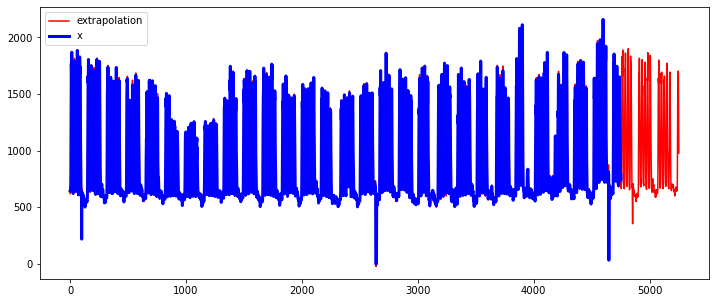

In [54]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 1000                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
x =dataset1['Ativa'].to_numpy()
n_predict = 500
extrapolation = fourierExtrapolation(x, n_predict)
pl.figure(figsize=(12,5))
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
pl.legend()
pl.show()

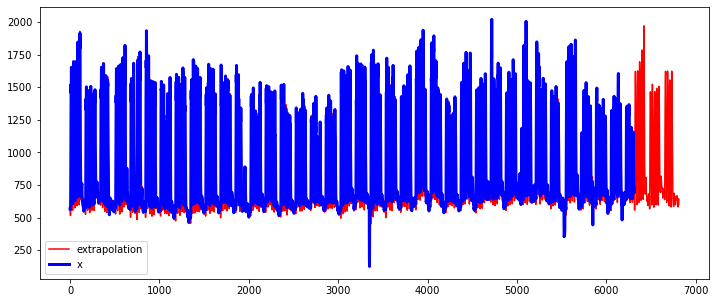

In [55]:
x =dataset2['Ativa'].to_numpy()
n_predict = 500
extrapolation = fourierExtrapolation(x, n_predict)
pl.figure(figsize=(12,5))
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
pl.legend()
pl.show()

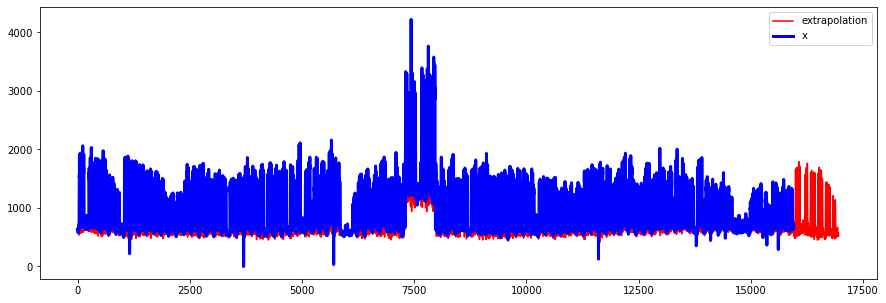

In [56]:
x =hourly_data['Ativa'].to_numpy()
n_predict = 1000
extrapolation = fourierExtrapolation(x, n_predict)
pl.figure(figsize=(15,5))
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
pl.legend()
pl.show()